## Mini Project III - Exploratory Data Analysis

### <u> NOTES </u>
- first 8 of acct_nbr are uniform.
- acct_nbr contains no duplicates
- one years worth of transactions
- 33 states, 69 cities
- Investigate clustering by 1st postal code
- Take absolute value when comparing transaction sum

### <u> CODES </u>

Transactions:
-    IN - interest
-    PM - loan payment
-    WD - withdraw
-    DP - deposit
-    IQ - inquiry (credit bureau)

Marriage:
* 1 = single
* 2 = married
* 3 = ~seperated 
* 4 = ~divorced 

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# root dfs
cust = pd.read_feather('created_data/customer.feather')
acc = pd.read_feather('created_data/account.feather')
tran = pd.read_feather('created_data/transactions.feather')


#account info
acc_cheq = pd.read_feather('created_data/account_checking.feather')
acc_cred = pd.read_feather('created_data/account_credit.feather')
acc_save = pd.read_feather('created_data/account_saving.feather')

#transaction info
tran_cheq = pd.read_feather('created_data/transaction_checking.feather')
tran_cred = pd.read_feather('created_data/transaction_credit.feather')
tran_save = pd.read_feather('created_data/transaction_saving.feather')


num of children and marital status = highest corr

marital status and age, then income and num of children follow.

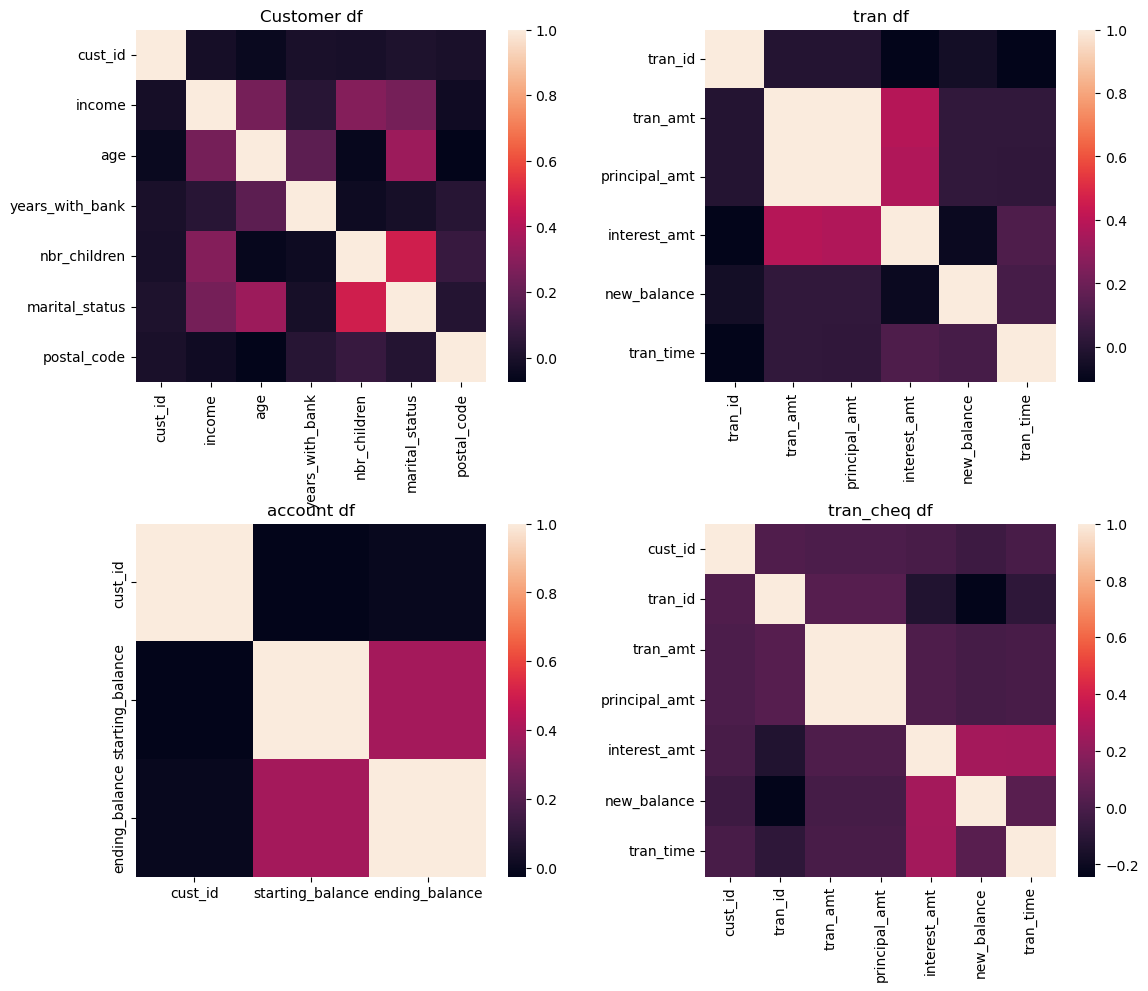

In [3]:
fig, axes = plt.subplots(2,2,figsize=(13,11))
sns.heatmap(cust.corr(),ax=axes[0,0])
axes[0,0].set_title('Customer df')
sns.heatmap(tran.corr(),ax=axes[0,1])
axes[0,1].set_title('tran df')
sns.heatmap(acc.corr(),ax=axes[1,0])
axes[1,0].set_title('account df')
sns.heatmap(tran_cheq.corr(),ax=axes[1,1])
axes[1,1].set_title('tran_cheq df')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

<AxesSubplot:xlabel='principal_amt', ylabel='tran_amt'>

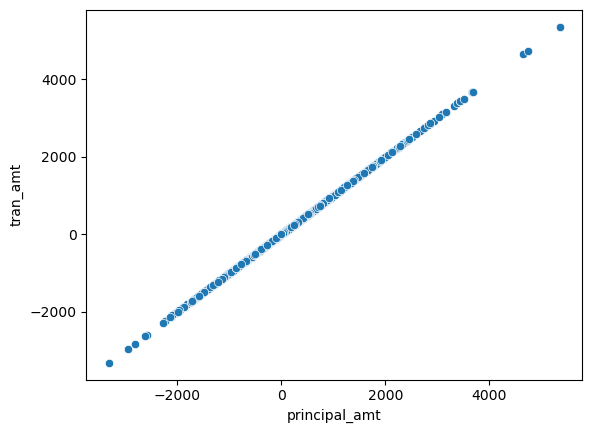

In [4]:
sns.scatterplot(x=tran_cheq['principal_amt'], y=tran_cheq['tran_amt'])

<AxesSubplot:xlabel='principal_amt', ylabel='tran_amt'>

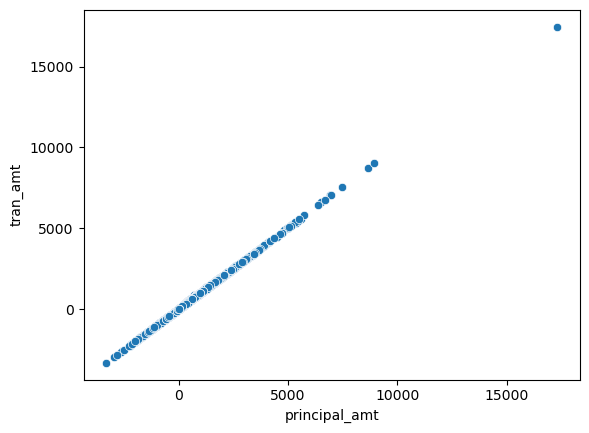

In [5]:
sns.scatterplot(x=tran['principal_amt'], y=tran['tran_amt'])

tran df
-One very high principal amount and transaction amount 

tran_cheq
-after around ~4000 there is a decent gap

In [6]:
acc_cust_combo = acc.merge(cust, on='cust_id',how='outer')
acc_cust_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   object 
 1   cust_id           1491 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   starting_balance  1409 non-null   float64
 4   ending_balance    1409 non-null   float64
 5   income            1491 non-null   int64  
 6   age               1491 non-null   int64  
 7   years_with_bank   1491 non-null   int64  
 8   nbr_children      1491 non-null   int64  
 9   gender            1491 non-null   object 
 10  marital_status    1491 non-null   int64  
 11  name_prefix       1491 non-null   object 
 12  postal_code       1491 non-null   int64  
 13  city_name         1491 non-null   object 
 14  state_code        1491 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 186.4+ KB


82 Customers do not have an account number. There is a value for their years with the bank? Not sure how to go about this as they are with the bank but the bank never assigned them an account number.

In [7]:
acc_cust_combo = acc.merge(cust,on='cust_id',how='inner')
acc_cust_combo

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
0,13628063,1362806,SV,1430.22,284.58,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
1,13628062,1362806,CK,218.47,2561.24,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
2,13628060,1362806,CC,214.46,1541.64,39382,24,3,1,M,3,Mr.,60605,Chicago,IL
3,13627090,1362709,CC,266.34,496.15,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA
4,13627093,1362709,SV,134.28,917.33,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,13630440,1363044,CC,150.30,523.08,15895,46,6,1,F,2,,20126,Washington,DC
1405,13627140,1362714,CC,175.29,457.29,14458,49,9,0,F,2,Ms.,46256,Indianapolis,IN
1406,13626683,1362668,SV,213.91,1470.67,0,13,5,0,M,1,,90750,Long Beach,CA
1407,13628933,1362893,SV,290.57,976.43,0,15,7,0,M,1,,97248,Portland,OR


<AxesSubplot:>

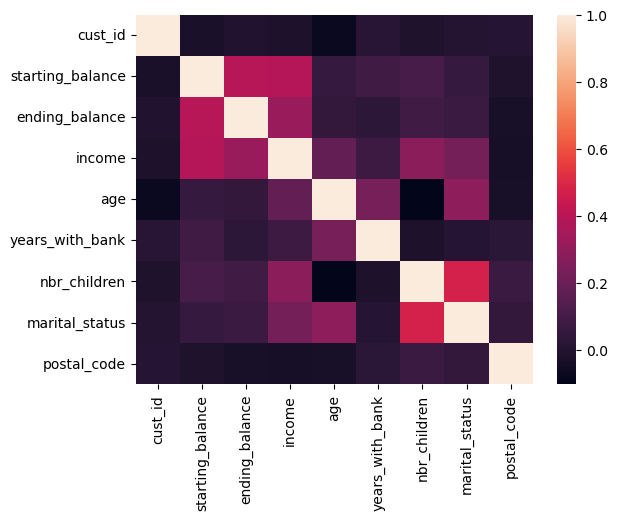

In [8]:
sns.heatmap(acc_cust_combo.corr())

Ending balance/starting balance, income/starting balance, ending balance/income are some minor correlations

In [9]:
main_3_df = acc_cust_combo.merge(tran, how='outer', on='acct_nbr')
main_3_df

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,...,city_name,state_code,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
0,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,39.0,0.00,0.00,0.0,283.87,1995-01-30,11.0,IQ
1,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,37.0,72.82,72.82,0.0,199.71,1995-01-28,13.0,DP
2,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,35.0,-186.89,-186.89,0.0,186.89,1995-01-28,12.0,TR
3,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,33.0,-80.00,-80.00,0.0,618.17,1995-01-26,18.0,WD
4,13628063,1362806.0,SV,1430.22,284.58,39382.0,24.0,3.0,1.0,M,...,Chicago,IL,31.0,0.00,0.00,0.0,201.82,1995-01-22,14.0,IQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77587,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.0,200.00,200.00,0.0,7500.23,1995-01-10,23.0,WD
77588,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,200.00,200.00,0.0,7700.23,1995-01-09,17.0,WD
77589,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,200.00,200.00,0.0,7900.23,1995-01-08,11.0,WD
77590,1376137423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,200.00,200.00,0.0,8100.23,1995-01-07,22.0,WD


In [10]:
main_3_df['acct_nbr'].nunique()

1410

A new account number was added after the merge. acct_nbr == 1376137423. Unsure if it is possible to relate it to a customer id through tran_id/date? -> After checking the other transaction tables, it does not seem like thats possible. Not sure how we want to go about it, as this account has a very large balance and a LARGE withdrawal, and missing information from the 21-30th where it GAINED around ~9k?? 

From my understanding, 
starting_balance = balance at the beginning of the year
ending_balance = final balance at the end of the year
new_balance = balance at that current time 
-> create a new column balance_diff which is ending_balance - starting_balance and check for people who GAINED or LOST money through this year in original acc_cust_combo df

In [11]:
tran[tran['acct_nbr'] == '1376137423'].sort_values('tran_date')

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
10519,2,1376137423,200.0,200.0,0.0,9300.23,1995-01-01,13.0,WD
7618,3,1376137423,200.0,200.0,0.0,9100.23,1995-01-02,6.0,WD
5140,4,1376137423,200.0,200.0,0.0,8900.23,1995-01-03,6.0,WD
2717,5,1376137423,200.0,200.0,0.0,8700.23,1995-01-04,16.0,WD
39,6,1376137423,200.0,200.0,0.0,8500.23,1995-01-05,12.0,WD
74912,7,1376137423,200.0,200.0,0.0,8300.23,1995-01-06,23.0,WD
72398,8,1376137423,200.0,200.0,0.0,8100.23,1995-01-07,22.0,WD
69857,9,1376137423,200.0,200.0,0.0,7900.23,1995-01-08,11.0,WD
67235,10,1376137423,200.0,200.0,0.0,7700.23,1995-01-09,17.0,WD
64554,11,1376137423,200.0,200.0,0.0,7500.23,1995-01-10,23.0,WD


In [12]:
tran_cheq[(tran_cheq['tran_id'] == 20) & (tran_cheq['tran_code'] == 'WD') & (tran_cheq['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
7395,1363200,20,-363.14,-363.14,0.0,782.47,1995-01-23,12.0,WD
26967,1362568,20,-175.96,-175.96,0.0,3329.74,1995-01-02,12.0,WD
34407,1362758,20,-258.02,-258.02,0.0,1050.02,1995-01-20,12.0,WD


In [13]:
tran_save[(tran_save['tran_id'] == 20) & (tran_save['tran_code'] == 'WD') & (tran_save['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
4455,1363452,20,-99.66,-99.66,0.0,2115.35,1995-01-29,12.0,WD
4853,1363158,20,-295.15,-295.15,0.0,1844.49,1995-01-24,12.0,WD


In [14]:
tran_cred[(tran_cred['tran_id'] == 20) & (tran_cred['tran_code'] == 'WD') & (tran_cred['tran_time']== 12.0)]

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code


<AxesSubplot:>

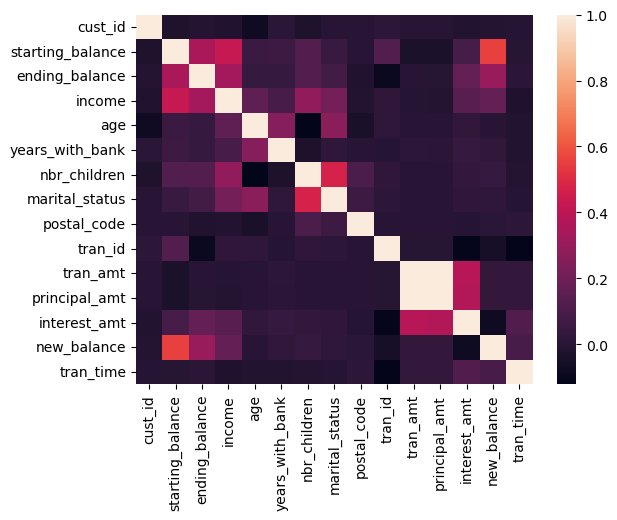

In [15]:
sns.heatmap(main_3_df.corr())

Very high correlation between new_balance and starting_balance

<AxesSubplot:xlabel='new_balance', ylabel='starting_balance'>

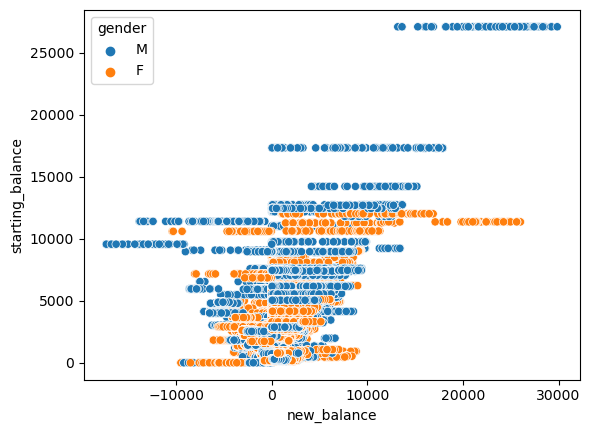

In [16]:
sns.scatterplot(x=main_3_df['new_balance'], y=main_3_df['starting_balance'],hue=main_3_df['gender'])

In [17]:
acc_cust_combo['balance_diff'] = acc_cust_combo['ending_balance'] - acc_cust_combo['starting_balance']
acc_cust_combo

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code,balance_diff
0,13628063,1362806,SV,1430.22,284.58,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,-1145.64
1,13628062,1362806,CK,218.47,2561.24,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,2342.77
2,13628060,1362806,CC,214.46,1541.64,39382,24,3,1,M,3,Mr.,60605,Chicago,IL,1327.18
3,13627090,1362709,CC,266.34,496.15,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,229.81
4,13627093,1362709,SV,134.28,917.33,5981,74,4,0,F,2,Dr.,90190,Los Angeles,CA,783.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,13630440,1363044,CC,150.30,523.08,15895,46,6,1,F,2,,20126,Washington,DC,372.78
1405,13627140,1362714,CC,175.29,457.29,14458,49,9,0,F,2,Ms.,46256,Indianapolis,IN,282.00
1406,13626683,1362668,SV,213.91,1470.67,0,13,5,0,M,1,,90750,Long Beach,CA,1256.76
1407,13628933,1362893,SV,290.57,976.43,0,15,7,0,M,1,,97248,Portland,OR,685.86


<AxesSubplot:>

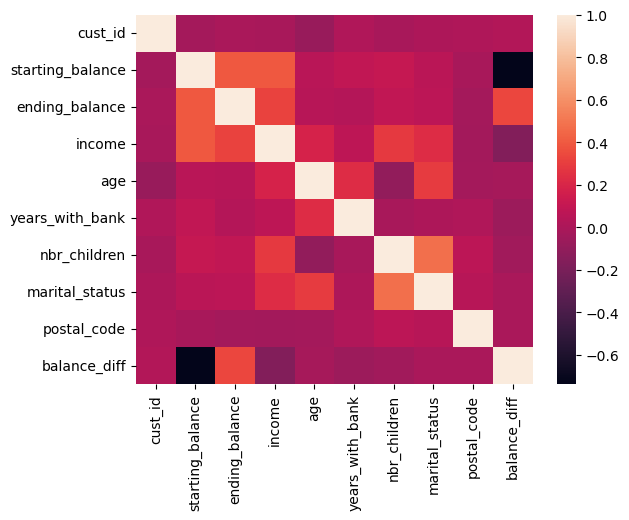

In [18]:
sns.heatmap(acc_cust_combo.corr())

In [19]:
#sns.pairplot(data=acc_cust_combo, corner=True) #Not much information can really be seen from the pairplot ~10secs to load it

<AxesSubplot:ylabel='Count'>

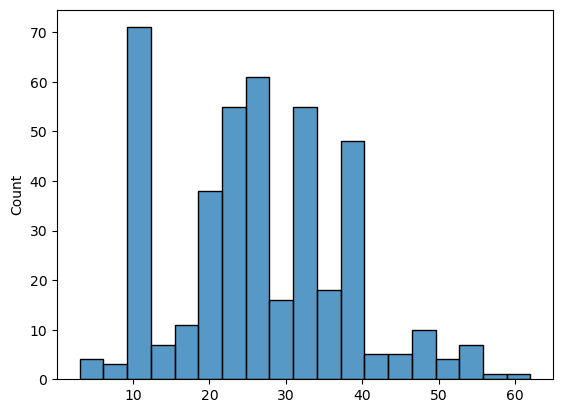

In [20]:
sns.histplot(tran_save.groupby('cust_id').size()) # Number of savings transactions

<AxesSubplot:ylabel='Count'>

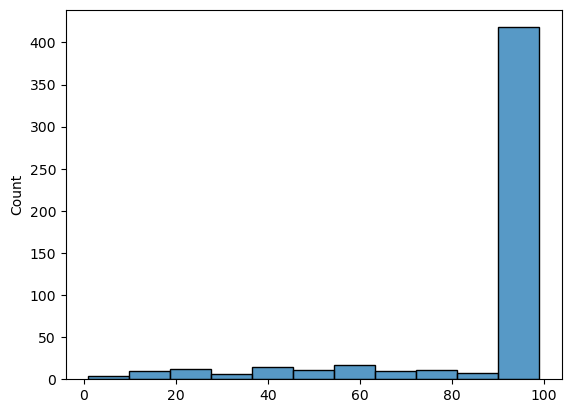

In [21]:
sns.histplot(tran_cheq.groupby('cust_id').size()) # Number of chequing transactions 

In [22]:
tran_cheq.groupby('cust_id').size().mode() # account limit of 99??

0    99
dtype: int64

<AxesSubplot:ylabel='Count'>

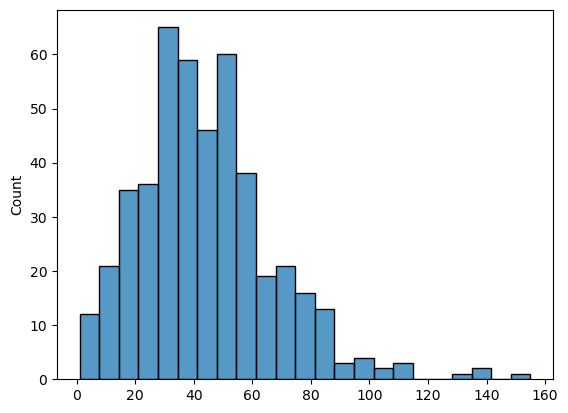

In [23]:
sns.histplot(tran_cred.groupby('cust_id').size()) # Number of credit transactions 

In [24]:
tran_cred.groupby('cust_id').size().sort_values(ascending=False)

cust_id
1363002    155
1362683    141
1362777    137
1363249    131
1362978    112
          ... 
1363237      1
1363133      1
1363146      1
1362619      1
1363169      1
Length: 457, dtype: int64

In [25]:
tran_cred[tran_cred['cust_id'] == 1363002].describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,155.0,155.000000,155.000000,155.000000,155.000000,155.000000,142.000000
mean,1363002.0,78.000000,-3.835355,-5.530645,1.697613,-3483.289355,13.302817
std,0.0,44.888751,929.295373,923.861746,6.550585,1424.592885,5.509488
min,1363002.0,1.000000,-946.120000,-946.120000,0.000000,-6100.000000,3.000000
25%,1363002.0,39.500000,-343.075000,-343.075000,0.000000,-4554.680000,10.000000
50%,1363002.0,78.000000,-189.210000,-189.210000,0.000000,-3479.090000,13.000000
75%,1363002.0,116.500000,-63.930000,-63.930000,0.000000,-2576.900000,18.000000
max,1363002.0,155.000000,5473.310000,5448.890000,38.940000,-50.500000,23.000000


In [30]:
tran_cred[tran_cred['cust_id'] == 1363002].sort_values(by='tran_date').head(30)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
18518,1363002,44,-139.95,-139.95,0.00,-3783.43,1995-01-01,13.0,CG
8129,1363002,117,-129.63,-129.63,0.00,-5389.84,1995-01-01,11.0,CG
19807,1363002,74,-592.26,-592.26,0.00,-6100.00,1995-01-01,11.0,CG
4164,1363002,143,-233.27,-233.27,0.00,-6034.25,1995-01-01,3.0,CG
15701,1363002,86,-113.33,-113.33,0.00,-5183.35,1995-01-02,13.0,CG
8980,1363002,1,-195.86,-195.86,0.00,-2023.07,1995-01-02,10.0,CG
9103,1363002,45,-139.31,-139.31,0.00,-3922.74,1995-01-02,10.0,CG
10316,1363002,31,-282.38,-282.38,0.00,-3657.36,1995-01-02,10.0,CG
19533,1363002,118,-710.16,-710.16,0.00,-6100.00,1995-01-02,16.0,CG
4410,1363002,85,-147.31,-147.31,0.00,-5070.02,1995-01-02,9.0,CG


cust_id 1363002 with the most transactions is interesting. The new_balance never goes out of the negatives and has a large difference in the transaction amounts

In [26]:
cust[cust['cust_id'] == 1363002]

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
656,1363002,40795,66,6,0,F,2,Ms.,10146,New York City,NY


In [27]:
cust[cust['postal_code'] == 10146]

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
261,1363003,7968,68,8,0,M,2,,10146,New York City,NY
656,1363002,40795,66,6,0,F,2,Ms.,10146,New York City,NY
